Steady-state (approx.) after 10 iterations:
[0.08708285 0.13075087 0.26112196 0.17365934 0.17372565 0.17365934]


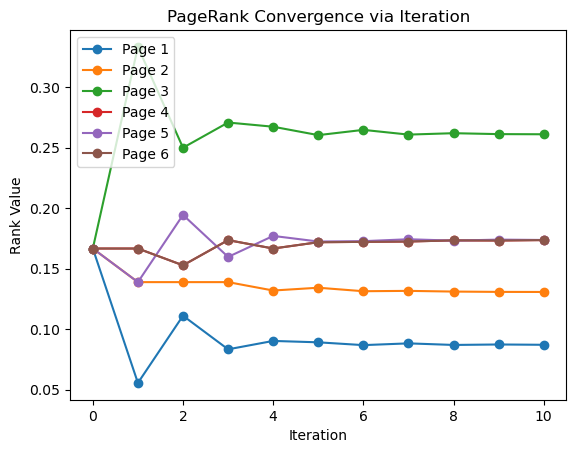

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperlink matrix (6x6) - fill in your actual entries:
H = np.array([
    [0,   0,   1/3, 0,   0,   0],
    [1/2, 0,   1/3, 0,   0,   0],
    [1/2, 1,   0,   0,   0,   1/2],
    [0,   0,   0,   0,   1/2, 1/2],
    [0,   0,   1/3, 1/2, 0,   0],
    [0,   0,   0,   1/2, 1/2, 0]
], dtype=float)

# Number of pages:
n = 6

# Initial rank vector (uniform):
x0 = np.ones(n) / n

# Number of iterations:
num_iters = 10

# Store each iterate for later plotting:
x_vals = [x0]
x = x0.copy()
for k in range(num_iters):
    x = H @ x
    x_vals.append(x)

x_vals = np.array(x_vals)

# Print the final approximate PageRank:
print("Steady-state (approx.) after", num_iters, "iterations:")
print(x)

# Plot the evolution of each page's rank:
for i in range(n):
    plt.plot(x_vals[:, i], marker='o', label=f"Page {i+1}")

plt.xlabel("Iteration")
plt.ylabel("Rank Value")
plt.title("PageRank Convergence via Iteration")
plt.legend()
plt.show()

In [2]:
import numpy as np

# The same 6x6 hyperlink matrix H from previous sections:
H = np.array([
    [0,   0,   1/3, 0,   0,   0],
    [1/2, 0,   1/3, 0,   0,   0],
    [1/2, 1,   0,   0,   0,   1/2],
    [0,   0,   0,   0,   1/2, 1/2],
    [0,   0,   1/3, 1/2, 0,   0],
    [0,   0,   0,   1/2, 1/2, 0]
], dtype=float)

# Compute eigenvalues/eigenvectors
vals, vecs = np.linalg.eig(H)

# Find the eigenvalue closest to 1:
idx = np.argmin(np.abs(vals - 1.0))

# Corresponding eigenvector
x_eig = vecs[:, idx]

# Normalize so entries sum to 1 (and ensure nonnegativity)
pagerank_eig = np.real(x_eig / np.sum(x_eig))
pagerank_eig = np.where(pagerank_eig < 0, 0, pagerank_eig)  # (just in case)

print("Eigenvalue-based PageRank:", pagerank_eig)

Eigenvalue-based PageRank: [0.08695652 0.13043478 0.26086957 0.17391304 0.17391304 0.17391304]
